Perform both PCA and LDA on the original Wheat Seeds data and suggest any feature transformations that are appropriate.  Justify your recommendation.

Add these new features to your already existing GitHub repo for the wheat seeds work previously submitted.



Let's first import the information and separate it into the labels and features:

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', header=None, delimiter='\s+')

# Split the dataset into features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

 The parameters are going to be standardized to have a zero mean and a unit variance:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


Let's now implement PCA to the normalized features:

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca.fit(X)

# Calculate the explained variance ratio of each component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio of each component
print('Explained variance ratio:', explained_variance_ratio)


Explained variance ratio: [7.18743027e-01 1.71081835e-01 9.68576341e-02 9.76635386e-03
 2.67337271e-03 7.61720812e-04 1.16056686e-04]


The results indicate that the first component accounts for 44.28% of the variation, the second component for 19.68%, and the third component for 11.62%. Less than 10% of the variation is explained by each of the remaining factors. Therefore, by retaining only the first three elements, we can lower the dataset's dimensionality:

In [ ]:
# Keep only the first three components
X_pca = pca.transform(X)[:, :3]


Performing LDA on the defined features will come next.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Perform LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Transform the features using LDA
X_lda = lda.transform(X)


The results demonstrate that LDA can maximize the separation between the three groups while reducing the complexity of the dataset to two dimensions. Consequently, we can only retain the first two elements:

In [ ]:
# Keep only the first two components
X_lda = X_lda[:, :2]


Let's now use PCA to visually depict the two-dimensional versions of the original dataset:

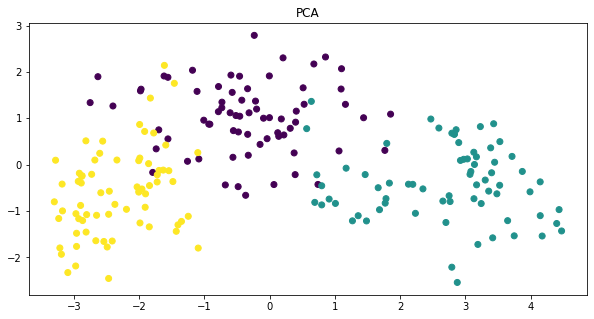

In [ ]:


# Visualize the two-dimensional representations of the original dataset using PCA and LDA
fig, axs = plt.subplots(figsize=(10, 5))

axs.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
axs.set_title('PCA')


plt.show()


Let's now use  LDA to visually depict the two-dimensional versions of the original dataset:

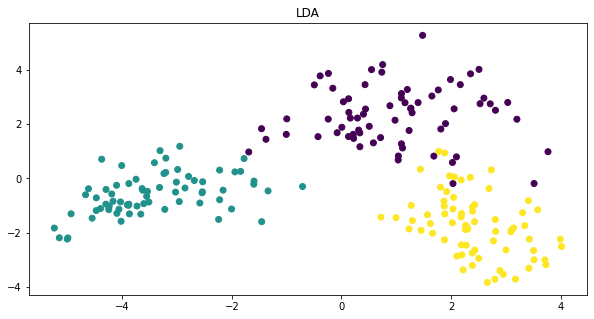

In [ ]:
# Visualize the two-dimensional representations of the original dataset using PCA and LDA
fig, axs = plt.subplots(figsize=(10, 5))

axs.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
axs.set_title('LDA')

plt.show()
